### 1.Import the necessary packages

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cm

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
!pip install bs4
from bs4 import BeautifulSoup


from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### 2.Finding the geo data for Los Angeles:

In [1]:
address = 'Los Angeles, California'

!conda install -c conda-forge geopy --yes
!pip install geopy --user
import geopy

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

### 3.Entering my information into the Foursquare API to access it:

In [2]:
CLIENT_ID = '4NE3QOLRZF00QCB5ND1OM5NX3I0QYKYRZITVZGJHXYMTOQTZ' # your Foursquare ID
CLIENT_SECRET = 'IRY5ADVGXL5CJWRLT2WSNIEFLDN2XZRR0PBGUKDE2NYK1BMQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4NE3QOLRZF00QCB5ND1OM5NX3I0QYKYRZITVZGJHXYMTOQTZ
CLIENT_SECRET:IRY5ADVGXL5CJWRLT2WSNIEFLDN2XZRR0PBGUKDE2NYK1BMQ


### 4.Creating a URL for all the venues in Los Angeles:

In [3]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=4NE3QOLRZF00QCB5ND1OM5NX3I0QYKYRZITVZGJHXYMTOQTZ&client_secret=IRY5ADVGXL5CJWRLT2WSNIEFLDN2XZRR0PBGUKDE2NYK1BMQ&v=20180605&ll=34.0536909, -118.2427666&radius=500&limit=100'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4NE3QOLRZF00QCB5ND1OM5NX3I0QYKYRZITVZGJHXYMTOQTZ&client_secret=IRY5ADVGXL5CJWRLT2WSNIEFLDN2XZRR0PBGUKDE2NYK1BMQ&v=20180605&ll=34.0536909, -118.2427666&radius=500&limit=100'

### 4.Pulling the JSON for the URL of venues:

In [5]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f255d10f025076adab1089a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Civic Center',
  'headerFullLocation': 'Civic Center, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': 34.0581909045, 'lng': -118.23734531946405},
   'sw': {'lat': 34.0491908955, 'lng': -118.24818788053594}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple & 1st St',
        'lat': 34.05503441823839,
        'lng': -118.24517873806079,
        'labeledLatLngs': [{'la

### 5.Pulling the data from Foursquare into a dataframe inorder to manipulate and use it:

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Grand Park,4fecf601067d351381ea64fa,Park,34.055034,-118.245179
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068
3,Kinokuniya Bookstore,4a8e024bf964a520ba1120e3,Bookstore,34.050145,-118.242246
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436
5,Blue Whale Bar,4b611730f964a52050092ae3,Jazz Club,34.049884,-118.242114
6,Fugetsu-Do Sweet Shop,4b5f9a18f964a520fcc329e3,Candy Store,34.050196,-118.240482
7,Marukai Market,4a8e02c9f964a520bb1120e3,Supermarket,34.050049,-118.242148
8,Birds & Bees,5873fafb5e789611577ee395,Speakeasy,34.052090,-118.247376
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696


In [8]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Grand Park,4fecf601067d351381ea64fa,Park,34.055034,-118.245179
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068
3,Kinokuniya Bookstore,4a8e024bf964a520ba1120e3,Bookstore,34.050145,-118.242246
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436
5,Blue Whale Bar,4b611730f964a52050092ae3,Jazz Club,34.049884,-118.242114
6,Fugetsu-Do Sweet Shop,4b5f9a18f964a520fcc329e3,Candy Store,34.050196,-118.240482
7,Marukai Market,4a8e02c9f964a520bb1120e3,Supermarket,34.050049,-118.242148
8,Birds & Bees,5873fafb5e789611577ee395,Speakeasy,34.052090,-118.247376
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696


In [9]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Park', 'Indian Restaurant', 'American Restaurant', 'Bookstore',
       'Breakfast Spot', 'Jazz Club', 'Candy Store', 'Supermarket',
       'Speakeasy', 'Coffee Shop', 'Museum', 'Udon Restaurant',
       'Music Venue', 'Ramen Restaurant', 'Theater', 'Sushi Restaurant',
       'Food & Drink Shop', 'Shopping Mall', 'Noodle House',
       "Men's Store", 'History Museum', 'Sandwich Place',
       'Sculpture Garden', 'Historic Site', 'Gift Shop'], dtype=object)

In [11]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Park', 'Bookstore', 'Jazz Club', 'Candy Store', 'Supermarket','Speakeasy','Museum','Music Venue', 'Theater', 'Shopping Mall',
       "Men's Store", 'History Museum','Sculpture Garden', 'Historic Site', 'Gift Shop']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202
13,Daikokuya,4127e200f964a520540c1fe3,Ramen Restaurant,34.049914,-118.240095
15,Mitsuru Sushi and Grill,4b5b6561f964a520b2fa28e3,Sushi Restaurant,34.050066,-118.240620
16,Midori Matcha,5869aa300037eb49446d5351,Food & Drink Shop,34.050011,-118.242124
17,Starbucks,57fd4578498e20e69bc98c2a,Coffee Shop,34.049518,-118.241908
19,Orochon Ramen,46ddce98f964a520934a1fe3,Noodle House,34.049939,-118.242319


### 6.From the list of venue ids, pull likes and add to the dataframe:

In [12]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['518471e6498e1c0b5f1401f9',
 '54938133498ed65f02e8c4ba',
 '51dccd46498e4f9ac4865270',
 '4e2071738130e92fc6a3f821',
 '5143f2d7e4b039102cf9793f',
 '4127e200f964a520540c1fe3',
 '4b5b6561f964a520b2fa28e3',
 '5869aa300037eb49446d5351',
 '57fd4578498e20e69bc98c2a',
 '46ddce98f964a520934a1fe3',
 '54aae895498e545686bde596',
 '4c50911b5ee81b8d33cacefe']

In [13]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id=4NE3QOLRZF00QCB5ND1OM5NX3I0QYKYRZITVZGJHXYMTOQTZ&client_secret=IRY5ADVGXL5CJWRLT2WSNIEFLDN2XZRR0PBGUKDE2NYK1BMQ&v=20180605&ll=34.0536909, -118.2427666&radius=500&limit=100'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[213, 218, 123, 340, 356, 585, 12, 28, 9, 162, 36, 1]


In [14]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

12
12


### 6.Prepping the data for clustering:

In [15]:
#let's make a copy of our initial dataframe just in case anything goes wrong

losangeles_venues = nearby_venues2.copy()
losangeles_venues.head()

,name,id,categories,lat,lng
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202


In [16]:
# add in the list of likes

losangeles_venues['total likes'] = like_list
losangeles_venues.head()

,name,id,categories,lat,lng,total likes
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571,213
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068,218
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436,123
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696,340
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202,356


In [17]:
# now let's bin total likes

print(losangeles_venues['total likes'].max())
print(losangeles_venues['total likes'].min())
print(losangeles_venues['total likes'].median())
print(losangeles_venues['total likes'].mean())

585
1
142.5
173.58333333333334


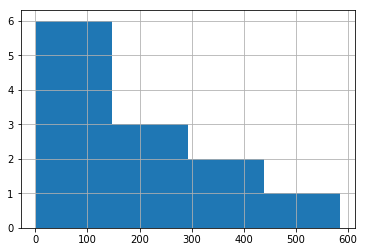

In [19]:
# let's visualize our total likes based on a histogram
%matplotlib inline
import matplotlib.pyplot as plt
losangeles_venues['total likes'].hist(bins=4)
plt.show()

In [21]:
# what are the bins we want to use?
import numpy as np
print(np.percentile(losangeles_venues['total likes'], 25))
print(np.percentile(losangeles_venues['total likes'], 50))
print(np.percentile(losangeles_venues['total likes'], 75))

24.0
142.5
248.5


In [24]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = losangeles_venues['total likes']<=24
below_avg = losangeles_venues[(losangeles_venues['total likes']>24) & (losangeles_venues['total likes']<=45)]
abv_avg = losangeles_venues[(losangeles_venues['total likes']>45) & (losangeles_venues['total likes']<=76)]
great = losangeles_venues['total likes']>76

In [ ]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

losangeles_venues['total likes_cat']=losangeles_venues.apply(conditions, axis=1)

In [25]:
losangeles_venues

,name,id,categories,lat,lng,total likes
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571,213
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068,218
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436,123
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696,340
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202,356
13,Daikokuya,4127e200f964a520540c1fe3,Ramen Restaurant,34.049914,-118.240095,585
15,Mitsuru Sushi and Grill,4b5b6561f964a520b2fa28e3,Sushi Restaurant,34.050066,-118.240620,12
16,Midori Matcha,5869aa300037eb49446d5351,Food & Drink Shop,34.050011,-118.242124,28
17,Starbucks,57fd4578498e20e69bc98c2a,Coffee Shop,34.049518,-118.241908,9
19,Orochon Ramen,46ddce98f964a520934a1fe3,Noodle House,34.049939,-118.242319,162


In [26]:
# let's star the process for re-categorizing the categories

losangeles_venues['categories'].unique()

array(['Indian Restaurant', 'American Restaurant', 'Breakfast Spot',
       'Coffee Shop', 'Udon Restaurant', 'Ramen Restaurant',
       'Sushi Restaurant', 'Food & Drink Shop', 'Noodle House',
       'Sandwich Place'], dtype=object)

In [31]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Food & Drink Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop', 'Breakfast Spot']
euro_asia_indian_food = ['Falafel Restaurant','Noodle House', 'Korean Restaurant', 'Ramen Restaurant', 'Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Udon Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

losangeles_venues['categories_new']=losangeles_venues.apply(conditions2, axis=1)

In [32]:
losangeles_venues

,name,id,categories,lat,lng,total likes,categories_new
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571,213,euro asia indian food
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068,218,american food
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436,123,other
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696,340,other
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202,356,euro asia indian food
13,Daikokuya,4127e200f964a520540c1fe3,Ramen Restaurant,34.049914,-118.240095,585,euro asia indian food
15,Mitsuru Sushi and Grill,4b5b6561f964a520b2fa28e3,Sushi Restaurant,34.050066,-118.240620,12,euro asia indian food
16,Midori Matcha,5869aa300037eb49446d5351,Food & Drink Shop,34.050011,-118.242124,28,other
17,Starbucks,57fd4578498e20e69bc98c2a,Coffee Shop,34.049518,-118.241908,9,other
19,Orochon Ramen,46ddce98f964a520934a1fe3,Noodle House,34.049939,-118.242319,162,euro asia indian food


In [35]:
# one hot encoding
import pandas as pd
losangeles_onehot = pd.get_dummies(losangeles_venues[['categories_new', 'total likes']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
losangeles_onehot['Name'] = losangeles_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [losangeles_onehot.columns[-1]] + list(losangeles_onehot.columns[:-1])
losangeles_onehot = losangeles_onehot[fixed_columns]

losangeles_onehot.head()

,Name,total likes,american food,euro asia indian food,other
1,Badmaash,213,0,1,0
2,Redbird,218,1,0,0
4,JiST Cafe,123,0,0,1
9,Cafe Demitasse,340,0,0,1
11,Marugame Monzo,356,0,1,0


### 7.Clustering:

In [38]:
cluster_df = losangeles_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
!pip3 install KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

/usr/bin/sh: pip3: command not found


array([2, 2, 2, 3, 3, 0, 1, 1, 1, 2], dtype=int32)

In [39]:
losangeles_venues['label'] = kmeans.labels_
losangeles_venues.head()

,name,id,categories,lat,lng,total likes,categories_new,label
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571,213,euro asia indian food,2
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068,218,american food,2
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436,123,other,2
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696,340,other,3
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202,356,euro asia indian food,3


In [54]:
!pip install folium
import pandas as pd
import folium
from IPython.display import display
import matplotlib.colors as colors
import matplotlib.cm as cm

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(losangeles_venues['lat'], losangeles_venues['lng'], losangeles_venues['name'], losangeles_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
display(map_clusters)

### CLUSTER 1

characteristics

    Poor quality food

In [50]:
losangeles_venues.loc[losangeles_venues['label']== 0]

,name,id,categories,lat,lng,total likes,categories_new,label
13,Daikokuya,4127e200f964a520540c1fe3,Ramen Restaurant,34.049914,-118.240095,585,euro asia indian food,0


### CLUSTER 2

characteristics

    below average quality food
    Mostly Europe / Asia inspired food

In [48]:
losangeles_venues.loc[losangeles_venues['label']==1]

,name,id,categories,lat,lng,total likes,categories_new,label
15,Mitsuru Sushi and Grill,4b5b6561f964a520b2fa28e3,Sushi Restaurant,34.050066,-118.240620,12,euro asia indian food,1
16,Midori Matcha,5869aa300037eb49446d5351,Food & Drink Shop,34.050011,-118.242124,28,other,1
17,Starbucks,57fd4578498e20e69bc98c2a,Coffee Shop,34.049518,-118.241908,9,other,1
22,My Ramen Bar,54aae895498e545686bde596,Noodle House,34.049993,-118.240341,36,euro asia indian food,1
23,Quiznos,4c50911b5ee81b8d33cacefe,Sandwich Place,34.054424,-118.240744,1,other,1


### CLUSTER 3

characteristics

    High quality food
    Mostly Mexican and South American food

In [49]:
losangeles_venues.loc[losangeles_venues['label']==2]

,name,id,categories,lat,lng,total likes,categories_new,label
1,Badmaash,518471e6498e1c0b5f1401f9,Indian Restaurant,34.051342,-118.244571,213,euro asia indian food,2
2,Redbird,54938133498ed65f02e8c4ba,American Restaurant,34.050666,-118.244068,218,american food,2
4,JiST Cafe,51dccd46498e4f9ac4865270,Breakfast Spot,34.050908,-118.240436,123,other,2
19,Orochon Ramen,46ddce98f964a520934a1fe3,Noodle House,34.049939,-118.242319,162,euro asia indian food,2


### CLUSTER 4

characteristics

    Above average quality food

In [52]:
losangeles_venues.loc[losangeles_venues['label']==3]

,name,id,categories,lat,lng,total likes,categories_new,label
9,Cafe Demitasse,4e2071738130e92fc6a3f821,Coffee Shop,34.049668,-118.241696,340,other,3
11,Marugame Monzo,5143f2d7e4b039102cf9793f,Udon Restaurant,34.049807,-118.240202,356,euro asia indian food,3
